# Part I - (Ford Bike Exploration)
## by (Toyyib Adelakun)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.
The above mentioned Data Set focuses on information with regard to the individual rides undertaken in a bike-sharing system expanded over the greater San Francisco Bay Area.
   
The Features included in the Data are as follows :

- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude
- Bike_share_for_all_trip



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info() #  Check column dtype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Check null value for each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
# Check duplicated row
df.duplicated().sum()

0

## Data Assesment Result
### Quality Issues

* start_time and end_time columns in object dtype
* start_station_id and end_station_id columns in int64 dtype
* start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns in float64 dtype
* bike_id column in int64 dtype
* user_type in object dtype



## Data Cleaning

### The programmatic data cleaning process:

* Define
* Code
* Test

What we will do for this dataframe is change columns dtype properly based on it's value.

As always, we need to copy our dataframe before do any cleaning process, so we can refer back to the old ones.

In [6]:
# Make a new copy before doing any operation, so we can refer back to the old ones.
df_clean = df.copy()

In [7]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',

        
        'bike_id': 'object',
        'user_type': 'category',
        'bike_share_for_all_trip': 'category'}

df_clean = df_clean.astype(dtype)

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [8]:

# Make new columns for analysis (month, start_day, end_day, and hour)

df_clean['month'] = df_clean['start_time'].dt.month_name()
df_clean['start_day'] = df_clean['start_time'].dt.day_name()
df_clean['end_date'] = df_clean['end_time'].dt.day_name()
df_clean['hour'] = df_clean['start_time'].dt.hour

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [10]:
df_clean['duration_min']=df_clean['duration_sec']/60
df_clean['duration_hr']=df_clean['duration_min']/60
df_clean['duration_min']=df_clean['duration_min'].astype(float)
df_clean['duration_hr']=df_clean['duration_hr'].astype(float)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,February,Thursday,Friday,17,869.750000,14.495833
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,February,Thursday,Friday,18,708.683333,11.811389
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,February,Thursday,Friday,12,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,February,Thursday,Friday,17,608.166667,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,February,Thursday,Friday,23,26.416667,0.440278


In [11]:
# create Age column  by subtracting member birth year from current year

df_clean['Age']= 2022 - df_clean['member_birth_year'] 
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,February,Thursday,Friday,17,869.750000,14.495833,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,February,Thursday,Friday,18,708.683333,11.811389,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,February,Thursday,Friday,12,1030.900000,17.181667,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,February,Thursday,Friday,17,608.166667,10.136111,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,February,Thursday,Friday,23,26.416667,0.440278,48.0


In [12]:
df_clean['Age'].describe()

count    175147.000000
mean         37.193563
std          10.116689
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: Age, dtype: float64

In [13]:
x = round(df_clean.Age.mean(),0)
x

37.0

In [14]:
df_clean['Age']=df_clean['Age'].fillna(x)# fill nan with the mean age

In [15]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr,Age
119606,141,2019-02-11 17:49:12.607,2019-02-11 17:51:34.010,245.0,Downtown Berkeley BART,37.870139,-122.268422,246.0,Berkeley Civic Center,37.869060,...,1993.0,Female,Yes,February,Monday,Monday,17,2.350000,0.039167,29.0
28119,379,2019-02-25 08:58:22.404,2019-02-25 09:04:42.163,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,49.0,S Park St at 3rd St,37.780760,...,1985.0,Male,No,February,Monday,Monday,8,6.316667,0.105278,37.0
154957,679,2019-02-06 09:09:03.219,2019-02-06 09:20:22.624,95.0,Sanchez St at 15th St,37.766219,-122.431060,89.0,Division St at Potrero Ave,37.769218,...,1982.0,Male,No,February,Wednesday,Wednesday,9,11.316667,0.188611,40.0
95986,1440,2019-02-15 11:34:58.027,2019-02-15 11:58:58.270,19.0,Post St at Kearny St,37.788975,-122.403452,386.0,24th St at Bartlett St,37.752105,...,1985.0,Male,No,February,Friday,Friday,11,24.000000,0.400000,37.0
137032,671,2019-02-08 09:00:05.554,2019-02-08 09:11:17.360,90.0,Townsend St at 7th St,37.771058,-122.402717,350.0,8th St at Brannan St,37.771431,...,1988.0,Male,No,February,Friday,Friday,9,11.183333,0.186389,34.0


In [16]:
df_clean.drop(['member_birth_year'], axis=1, inplace=True)

In [17]:
df_clean['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [18]:
df_clean.start_day.value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

In [19]:
df_clean.month.value_counts()

February    183412
Name: month, dtype: int64

In [20]:
df_clean.hour.value_counts()

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: hour, dtype: int64

In [21]:
df_clean.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_gender              8265
bike_share_for_all_trip       0
month                         0
start_day                     0
end_date                      0
hour                          0
duration_min                  0
duration_hr                   0
Age                           0
dtype: int64

In [22]:
# calculate distance
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2
                               + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

In [23]:
# df_clean['distance']=df_clean['distance'] * 1000
df_clean['distance']

0         0.005067
1         0.015730
2         0.027784
3         0.002721
4         0.025835
            ...   
183407    0.016668
183408    0.013549
183409    0.004080
183410    0.006864
183411    0.007225
Name: distance, Length: 183412, dtype: float64

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset consists of 183412 rows × 16 columns. In the other words, this dataset has 183412 observations and 16 variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on other specifications from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that trip duration is highly dependent on the start stations and end stations, more crowded places should receive more rides so some stations should be logging more duration sec. I also think user_type, Age and gender should also effect trip duration.

### Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: **Duration**

In [25]:
df_clean['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

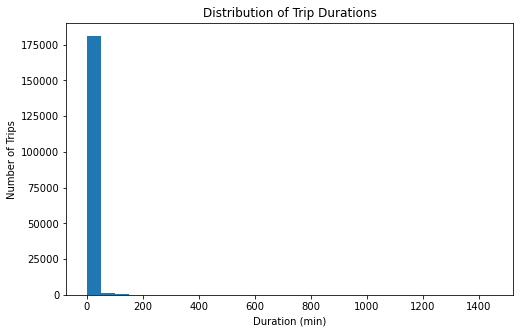

In [26]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
# plt.axis([-10,10, 0, 50])
plt.show()

In [27]:
np.log10(df_clean['duration_min'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_min, dtype: float64

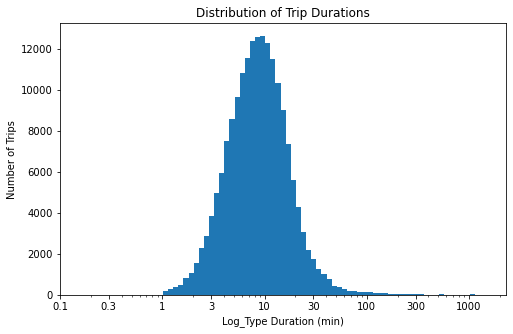

In [28]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=[8, 5])
binsize = 0.05
bins = 10 ** np.arange(0.007, 3.2+binsize, binsize)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.title('Distribution of Trip Durations')
plt.xlabel('Log_Type Duration (min)')
plt.ylabel('Number of Trips')
plt.xticks(ticks, labels);

Trip duration  has a long-tailed distribution, with a lot of short trip time, and few on the long trip time. When plotted on a log-scale, the Trip duration  distribution has a bell curve shape, with the peak between 3mins and 30mins.

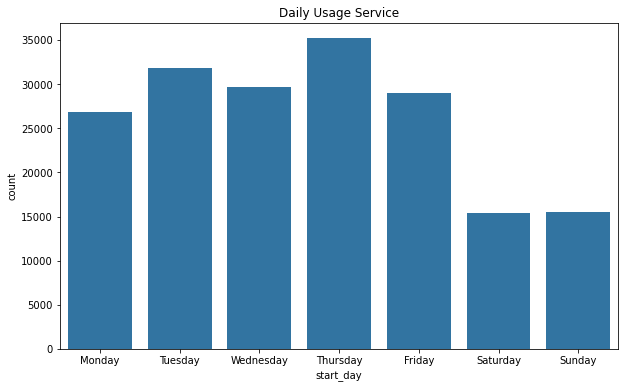

In [29]:
# Countplot bike usage based on weekday

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
plt.title('Daily Usage Service')
sns.countplot(data=df_clean, x='start_day', order=day_name, color=base_color);

This service is more widely used on weekdays than weekends. Because the majority of users are subscribers who are actively going to the office on weekdays.


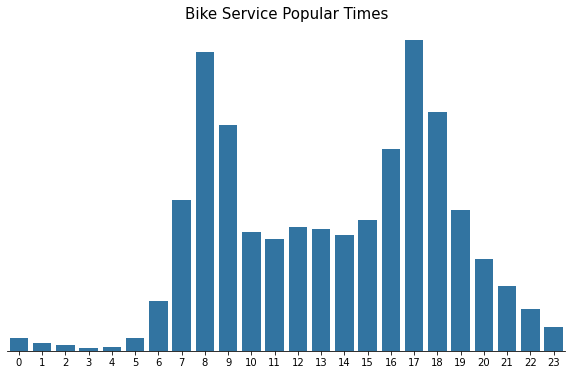

In [30]:
# Popular time(hour) of the day more bike service was reequested
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df_clean, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');



> Based on the plotting above, the use of bike services is the most during peak hours(0800hrs and 1700hrs) which implies the resumption and closing hours of a weekday.


In [31]:
df_clean['Age'].describe()

count    183412.000000
mean         37.184841
std           9.886200
min          21.000000
25%          30.000000
50%          35.000000
75%          41.000000
max         144.000000
Name: Age, dtype: float64

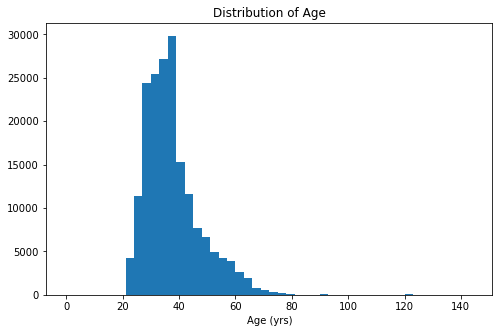

In [32]:
# start with a standard-scaled plot
binsize = 3
bins = np.arange(0, df_clean['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'Age', bins = bins)
plt.title('Distribution of Age')
plt.xlabel('Age (yrs)')
plt.show()


We can see that the distribution is more concentrated between 20 to 40 years old

In [33]:
df_clean.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

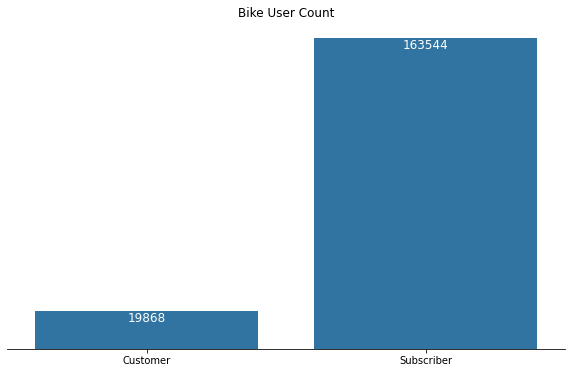

In [34]:

# Show number of user using countplot

plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df_clean, x ='user_type', color=base_color)

# add annotations
n_points = df_clean.shape[0]
cat_counts = df_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('Bike User Count')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();



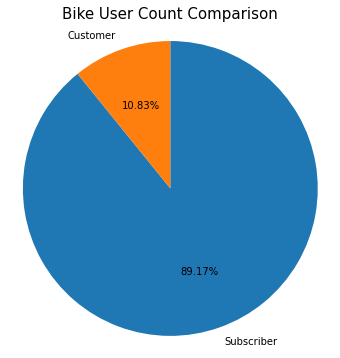

In [35]:
# Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

From the total entry of 183412 entries row data, more than three-quarter users is Subscribers.

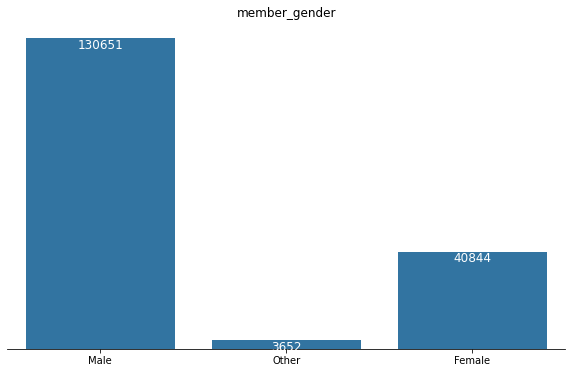

In [36]:
# Show Gender  using countplot

plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df_clean, x ='member_gender', color=base_color)

# add annotations
n_points = df_clean.shape[0]
cat_counts = df_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('member_gender')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();



Ford Bike has high number of male Users

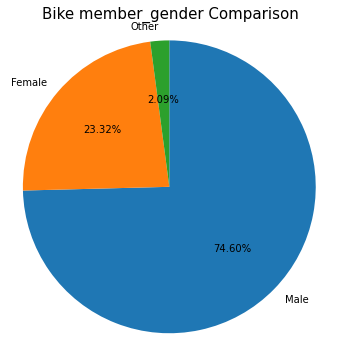

In [37]:
# Show Gender by it's percentage
plt.figure(figsize=(10,6))
sorted_counts = df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike member_gender Comparison', fontsize=15);

From the above plot; major user of bike is male

In [38]:
df_clean.start_station_name.nunique()

329

In [39]:
# df_clean.start_station_name.unique()

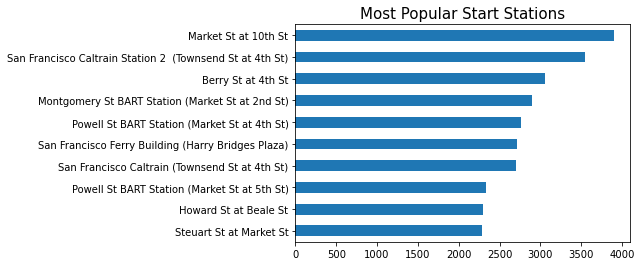

In [40]:
plt.title('Most Popular Start Stations', fontsize=15)
df_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data has a bell curve shape,  with the peak between 3mins and 30mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there is some problem to this Ford GoBike  data, such as:

      * Quality issues for many columns, which is the dtype is not suitable with it's data
      * I have to add some column to extend our time- based analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [41]:
df_clean.head(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr,Age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,February,Thursday,Friday,17,869.750000,14.495833,38.0,0.005067
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,February,Thursday,Friday,18,708.683333,11.811389,37.0,0.015730
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,February,Thursday,Friday,12,1030.900000,17.181667,50.0,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,February,Thursday,Friday,17,608.166667,10.136111,33.0,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,February,Thursday,Friday,23,26.416667,0.440278,48.0,0.025835
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,February,Thursday,Friday,23,29.883333,0.498056,63.0,0.031301
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,February,Thursday,Friday,23,19.116667,0.318611,39.0,0.020890


In [42]:
df_clean[['duration_min','Age']].describe()

,duration_min,Age
count,183412.000000,183412.000000
mean,12.101307,37.184841
std,29.906496,9.886200
min,1.016667,21.000000
25%,5.416667,30.000000
50%,8.566667,35.000000
75%,13.266667,41.000000
max,1424.066667,144.000000


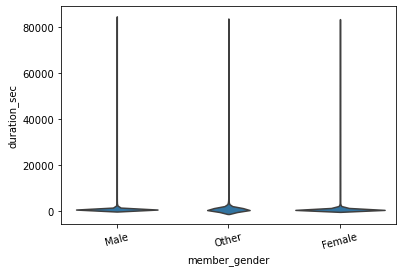

In [43]:
base_color = sns.color_palette()[0]
sns.violinplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color, inner=None)
plt.xticks(rotation=15);

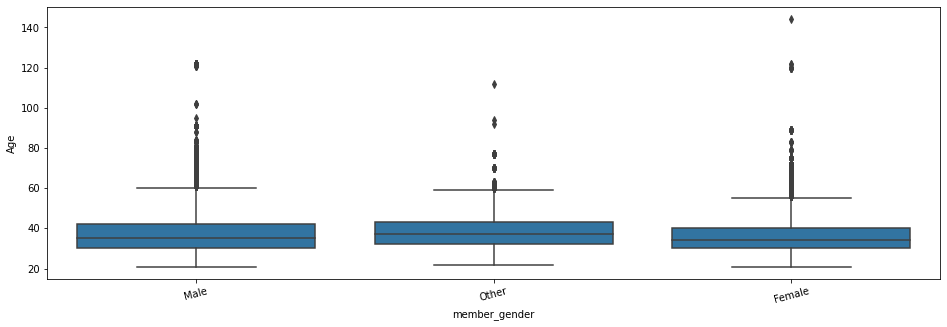

In [44]:
# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_gender', y='Age', color=base_color)
plt.xticks(rotation=15);

lets look into the dependency of trip durations on gender and on member type.

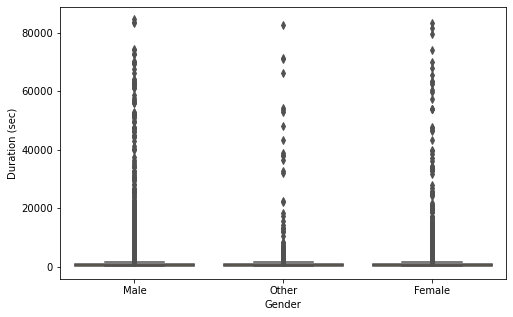

In [45]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2000 sec to get clearer picture.

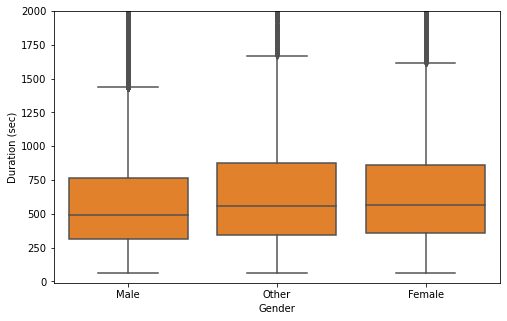

In [46]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

Though quantity of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males.

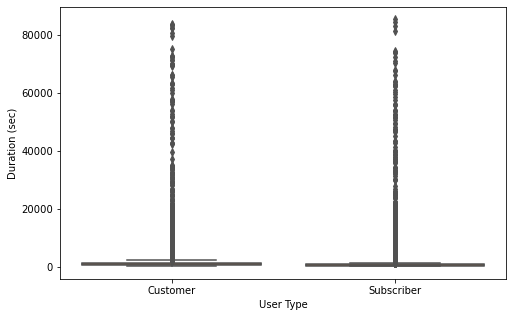

In [47]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show();

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2500 sec to get clearer picture.

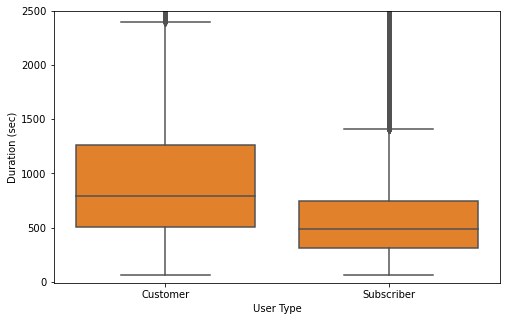

In [48]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show();

Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.

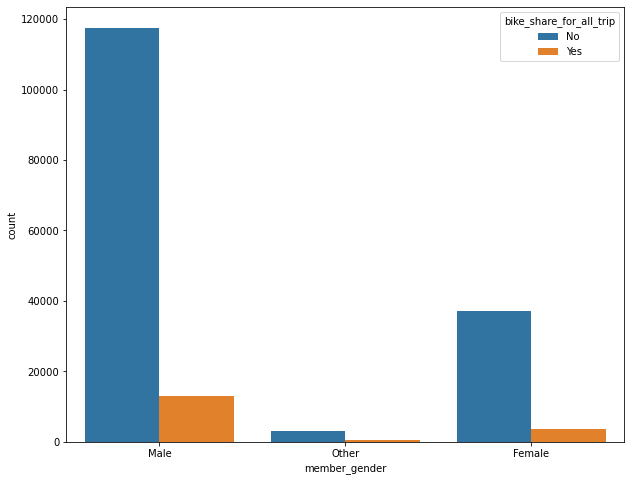

In [49]:
# Relationship between Gender and bike shared for trip
plt.figure(figsize = [10, 8])
sns.countplot(data=df_clean, x='member_gender',hue='bike_share_for_all_trip');

In [50]:
# Heat map(correlation) for for Trip start day and gender

#  Days of the week
start_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

# Returns the Days of the week with the categories and orderedness
days = pd.api.types.CategoricalDtype(ordered=True, categories=start_day)

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
df_clean['start_day'] = df_clean['start_day'].astype(days);

# Use group_by() and size() to get the Gender and each  Trip start_day as a pandas Series
ct_counts = df_clean.groupby(['member_gender', 'start_day']).size()
ct_counts

member_gender  start_day
Female         Monday        5810
               Tuesday       7263
               Wednesday     6565
               Thursday      8042
               Friday        6136
               Saturday      3456
               Sunday        3572
Male           Monday       19341
               Tuesday      22788
               Wednesday    21288
               Thursday     24963
               Friday       20966
               Saturday     10674
               Sunday       10631
Other          Monday         535
               Tuesday        565
               Wednesday      603
               Thursday       728
               Friday         580
               Saturday       312
               Sunday         329
dtype: int64

In [51]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts
# df = df.reset_index(drop=True)

,member_gender,start_day,count
0,Female,Monday,5810
1,Female,Tuesday,7263
2,Female,Wednesday,6565
3,Female,Thursday,8042
4,Female,Friday,6136
5,Female,Saturday,3456
6,Female,Sunday,3572
7,Male,Monday,19341
8,Male,Tuesday,22788
9,Male,Wednesday,21288


In [52]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index ='member_gender',columns = 'start_day', values = 'count')
ct_counts

start_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_gender,,,,,,,
Female,5810,7263,6565,8042,6136,3456,3572
Male,19341,22788,21288,24963,20966,10674,10631
Other,535,565,603,728,580,312,329


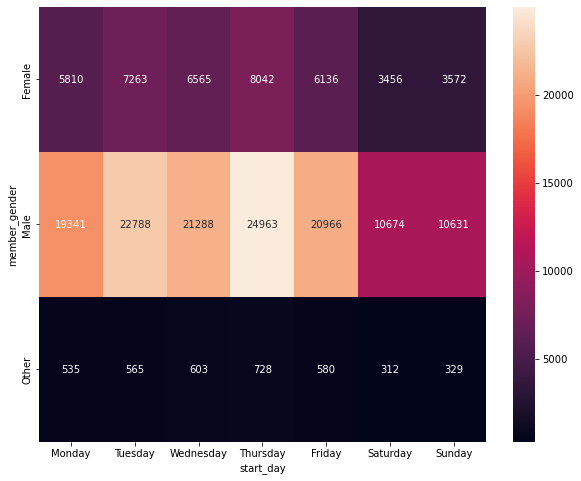

In [53]:
plt.figure(figsize = [10, 8])

#  Days of the week
start_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

# Returns the Days of the week with the categories and orderedness
days = pd.api.types.CategoricalDtype(ordered=True, categories=start_day)

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
df_clean['start_day'] = df_clean['start_day'].astype(days);

# Use group_by() and size() to get the Gender and each  Trip start_day as a pandas Series
ct_counts = df_clean.groupby(['member_gender', 'start_day']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')


# Use DataFrame.pivot() to rearrange the data, to have Days of the week on rows
ct_counts = ct_counts.pivot(index ='member_gender',columns = 'start_day', values = 'count')


sns.heatmap(ct_counts, annot = True, fmt = 'd');

through out the week the male suscriber has the highest ride 

<Figure size 720x1440 with 0 Axes>

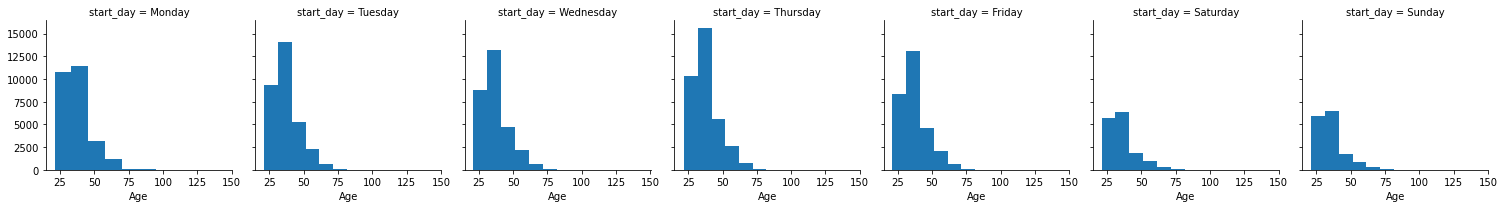

In [54]:
plt.figure(figsize = [10, 20]);
g = sns.FacetGrid(data = df_clean, col = 'start_day')
g.map(plt.hist, 'Age');

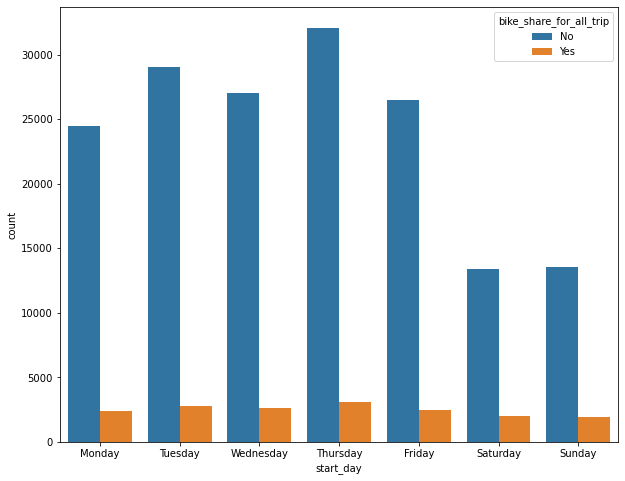

In [55]:
# Relationship between Trip start day and bike shared for trip
plt.figure(figsize = [10, 8])
sns.countplot(data=df_clean, x='start_day',hue='bike_share_for_all_trip');

there was few bike shared  compared to non-shared bike trip

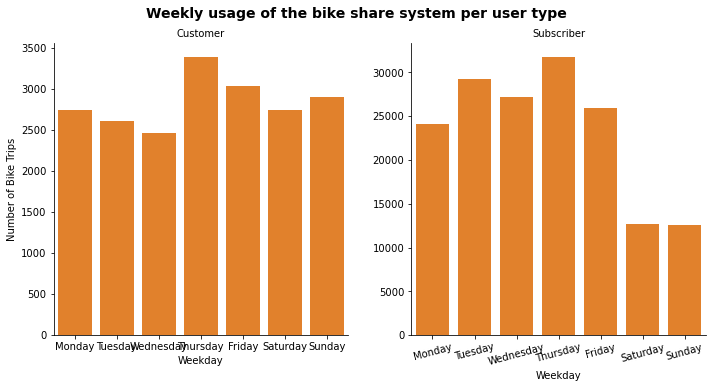

In [56]:
g = sns.catplot(data=df_clean, x='start_day', col="user_type", kind='count', sharey = False,color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
plt.xticks(rotation=15)
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

Among the subscribers, we find that Saturday and Sunday is not utlized the most but is among the customers. Among the customers, we find that wednesday is not utlizied as much as Tuesday's for subscribers. This clearly shows, subscribers and customers have a very different life and workstyle.

In [57]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,month,start_day,end_date,hour,duration_min,duration_hr,Age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,February,Thursday,Friday,17,869.750000,14.495833,38.0,0.005067
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,February,Thursday,Friday,18,708.683333,11.811389,37.0,0.015730
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,February,Thursday,Friday,12,1030.900000,17.181667,50.0,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,February,Thursday,Friday,17,608.166667,10.136111,33.0,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,February,Thursday,Friday,23,26.416667,0.440278,48.0,0.025835


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 * Trip Duration is very dependendable on the age of the member.
 * there was not much bike shared trip by the users.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 * Users different life and workstyle has effect on the number of trip been made weekly

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

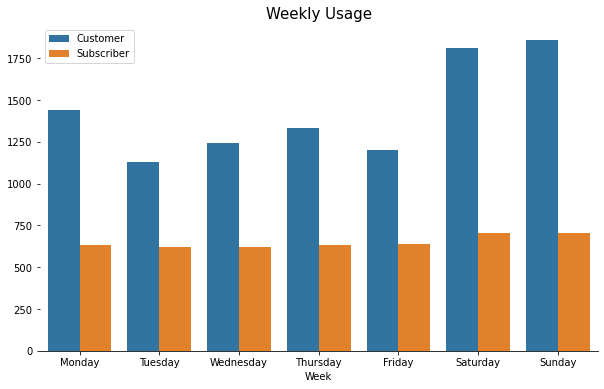

In [58]:
# user weekly Trip dUration
plt.figure(figsize=(10,6))
plt.title('Weekly Usage', fontsize=15)
chart = sns.barplot(data=df_clean, x='start_day', y='duration_sec', hue='user_type', ci=None)

chart.set(xlabel='Week', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

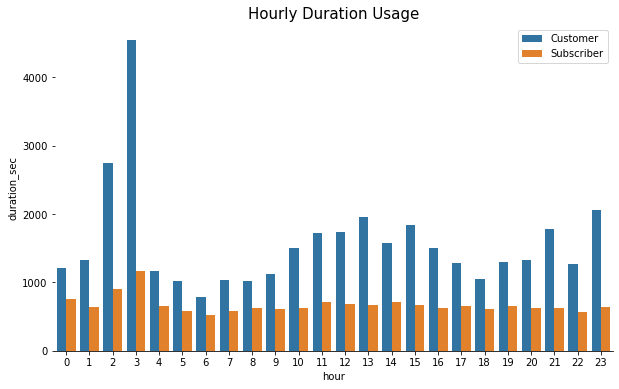

In [59]:
# user daily(hour of the day) Trip duration 
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df_clean, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

user trip duration is high  during the early hour of the day (2,3)hour ,and lower during the (6,7)hour of the day

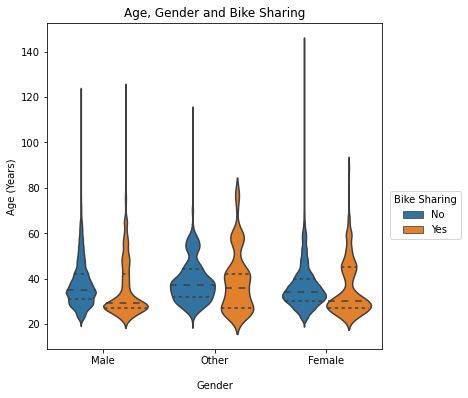

In [60]:
plt.figure(figsize=[6,6])
sns.violinplot(data=df_clean,x='member_gender',y='Age',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Age (Years)')
plt.title('Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.25,0.5));

Bike Sharing is associated with younger age in all genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as:

   > Duration of use

        Subscribers tends to have stable duration usage than Customers

   > Days of use

        Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time.

   > Hours of use

        Subscribers is have very intense usage at peak hour, Customers have more flexible time.



### Were there any interesting or surprising interactions between features?

> It's kind of surprise that average duration at 3.00 AM is most high than in other hour.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [61]:
df_clean.to_csv('ford.csv', index=False)